In [1]:
import glob
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
import numpy as np
#from imgaug import augmenters as iaa
#import cv2
from keras.layers.normalization import BatchNormalization
#import seaborn as sns
import pandas as pd 
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf
from keras.models import Model

Using TensorFlow backend.


In [2]:
path = '../input/d/mashfiqrizvee/sampledataset2/'


# define paths
train_air_trapping_dir = path + 'Train/Air_trapping/'
train_aortic_elongation_dir = path + 'Train/Aortic_elongation/'
train_calcified_granuloma_dir = path + 'Train/Air_trapping/'
train_calcified_granuloma_dir = path + 'Train/Calcified_granuloma/'
train_callus_rib_fracture_dir = path + 'Train/Callus_rib_fracture/'
train_hiatal_hernia_dir = path + 'Train/Hiatal_hernia/'
train_laminar_atelectasis_fracture_dir = path + 'Train/Laminar_atelectasis/'
train_pleural_effusion_dir = path + 'Train/Pleural_effusion/'

test_air_trapping_dir = path + 'Test/Air_trapping/'
test_aortic_elongation_dir = path + 'Test/Aortic_elongation/'
test_calcified_granuloma_dir = path + 'Test/Calcified_granuloma/'
test_callus_rib_fracture_dir = path + 'Test/Callus_rib_fracture/'
test_hiatal_hernia_dir = path + 'Test/Hiatal_hernia/'
test_laminar_atelectasis_fracture_dir = path + 'Test/Laminar_atelectasis/'
test_pleural_effusion_dir = path + 'Test/Pleural_effusion/'

val_air_trapping_dir = path + 'val/Air_trapping/'
val_aortic_elongation_dir = path + 'val/Aortic_elongation/'
val_calcified_granuloma_dir = path + 'val/Calcified_granuloma/'
val_callus_rib_fracture_dir = path + 'val/Callus_rib_fracture/'
val_hiatal_hernia_dir = path + 'val/Hiatal_hernia/'
val_laminar_atelectasis_fracture_dir = path + 'val/Laminar_atelectasis/'
val_pleural_effusion_dir = path + 'val/Pleural_effusion/'


# find all files, our files has extension jpeg
#train_normal_cases = glob.glob(train_normal_dir + '*png')
train_air_trapping_cases = glob.glob(train_air_trapping_dir + '*png')
train_aortic_elongation_cases = glob.glob(train_aortic_elongation_dir + '*png')
train_calcified_granuloma_cases = glob.glob(train_calcified_granuloma_dir + '*png')
train_callus_rib_fracture_cases = glob.glob(train_callus_rib_fracture_dir + '*png')
train_hiatal_hernia_cases = glob.glob(train_hiatal_hernia_dir + '*png')
train_laminar_atelectasis_fracture_cases = glob.glob(train_laminar_atelectasis_fracture_dir + '*png')
train_pleural_effusion_cases = glob.glob(train_pleural_effusion_dir + '*png')

test_air_trapping_cases = glob.glob(test_air_trapping_dir + '*png')
test_aortic_elongation_cases = glob.glob(test_aortic_elongation_dir + '*png')
test_calcified_granuloma_cases = glob.glob(test_calcified_granuloma_dir + '*png')
test_callus_rib_fracture_cases = glob.glob(test_callus_rib_fracture_dir + '*png')
test_hiatal_hernia_cases = glob.glob(test_hiatal_hernia_dir + '*png')
test_laminar_atelectasis_fracture_cases = glob.glob(test_laminar_atelectasis_fracture_dir + '*png')
test_pleural_effusion_cases = glob.glob(test_pleural_effusion_dir + '*png')

val_air_trapping_cases = glob.glob(val_air_trapping_dir + '*png')
val_aortic_elongation_cases = glob.glob(val_aortic_elongation_dir + '*png')
val_calcified_granuloma_cases = glob.glob(val_calcified_granuloma_dir + '*png')
val_callus_rib_fracture_cases = glob.glob(val_callus_rib_fracture_dir + '*png')
val_hiatal_hernia_cases = glob.glob(val_hiatal_hernia_dir + '*png')
val_laminar_atelectasis_fracture_cases = glob.glob(val_laminar_atelectasis_fracture_dir + '*png')
val_pleural_effusion_cases = glob.glob(val_pleural_effusion_dir + '*png')


# make path using / instead of \\ ... this may be redudant step
'''
train_normal_cases = [x.replace('\\', '/') for x in train_normal_cases]
train_pneu_cases = [x.replace('\\', '/') for x in train_pneu_cases]

test_normal_cases = [x.replace('\\', '/') for x in test_normal_cases]
test_pneu_cases = [x.replace('\\', '/') for x in test_pneu_cases]
val_normal_cases = [x.replace('\\', '/') for x in val_normal_cases]
val_pneu_cases = [x.replace('\\', '/') for x in val_pneu_cases]

'''

# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_air_trapping_cases:
    train_list.append([x, 0])
    
for x in train_aortic_elongation_cases:
    train_list.append([x, 1])

for x in train_calcified_granuloma_cases:
    train_list.append([x, 2])
    
for x in train_callus_rib_fracture_cases:
    train_list.append([x, 3])

for x in train_hiatal_hernia_cases:
    train_list.append([x,4])
    
for x in train_laminar_atelectasis_fracture_cases:
    train_list.append([x,5])
    
for x in train_pleural_effusion_cases:
    train_list.append([x,6])

for x in test_air_trapping_cases:
    test_list.append([x, 0])
    
for x in test_aortic_elongation_cases:
    test_list.append([x, 1])    

for x in test_calcified_granuloma_cases:
    test_list.append([x, 2])
    
for x in test_callus_rib_fracture_cases:
    test_list.append([x, 3])

for x in test_hiatal_hernia_cases:
    test_list.append([x,4])
    
for x in test_laminar_atelectasis_fracture_cases:
    test_list.append([x,5])
    
for x in test_pleural_effusion_cases:
    test_list.append([x,6])
    
for x in val_air_trapping_cases:
    val_list.append([x, 0])
    
for x in val_aortic_elongation_cases:
    val_list.append([x, 1])
    
for x in val_calcified_granuloma_cases:
    val_list.append([x, 2])
    
for x in val_callus_rib_fracture_cases:
    val_list.append([x, 3])

for x in val_hiatal_hernia_cases:
    val_list.append([x,4])
    
for x in val_laminar_atelectasis_fracture_cases:
    val_list.append([x,5])
    
for x in val_pleural_effusion_cases:
    val_list.append([x,6])


# shuffle/randomize data as they were loaded in order: normal cases, then pneumonia cases
rn.shuffle(train_list)
rn.shuffle(test_list)
rn.shuffle(val_list)


# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])
val_df = pd.DataFrame(val_list, columns=['image', 'label'])

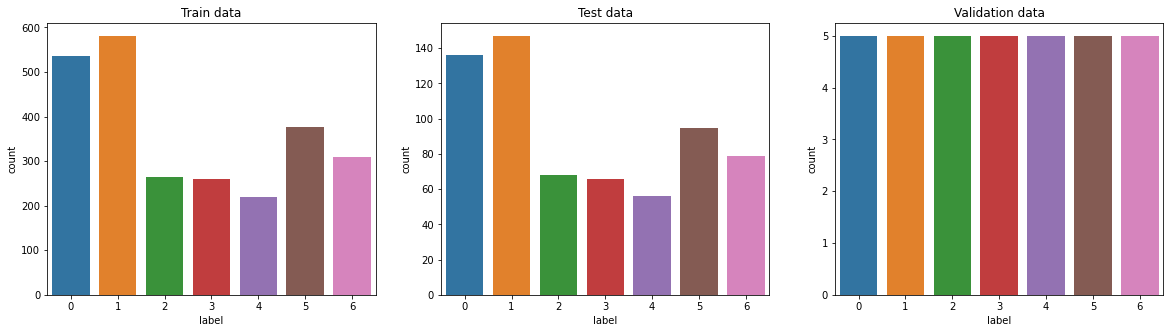

In [3]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(train_df['label'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_df['label'])
plt.title('Test data')

plt.subplot(1,3,3)
sns.countplot(val_df['label'])
plt.title('Validation data')

plt.show()

In [4]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (196, 196))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (196,196,1))
    
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        data.append(process_data(img_path))
        labels.append(label)
        
    return np.array(data), np.array(labels)

In [5]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_val, y_val = compose_dataset(val_df)

print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))
print('Validation data shape: {}, Labels shape: {}'.format(X_val.shape, y_val.shape))

Train data shape: (2548, 196, 196, 1), Labels shape: (2548,)
Test data shape: (647, 196, 196, 1), Labels shape: (647,)
Validation data shape: (35, 196, 196, 1), Labels shape: (35,)


In [6]:
# define generator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)



# fit generator on our train features
datagen.fit(X_train)

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [8]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19



In [9]:
'''
def vgg():
    base_model = VGG16(weights=None,include_top=False,pooling='avg',input_shape=(196,196,1))
    predictions=Dense(5,activation='softmax',trainable=True)(base_model.output)
    for layer in base_model.layers:
        layer.trainable=True
    model=Model(inputs=[base_model.input], outputs=[predictions])
    
    optim = tf.keras.optimizers.Adam(lr=1e-5,decay=1e-5)
    #loss_func = 'mae'
    
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

model=None
model = vgg()
model.summary()
'''

"\ndef vgg():\n    base_model = VGG16(weights=None,include_top=False,pooling='avg',input_shape=(196,196,1))\n    predictions=Dense(5,activation='softmax',trainable=True)(base_model.output)\n    for layer in base_model.layers:\n        layer.trainable=True\n    model=Model(inputs=[base_model.input], outputs=[predictions])\n    \n    optim = tf.keras.optimizers.Adam(lr=1e-5,decay=1e-5)\n    #loss_func = 'mae'\n    \n    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])\n    return model\n\nmodel=None\nmodel = vgg()\nmodel.summary()\n"

In [10]:

from keras.optimizers import Adam, RMSprop

In [11]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(196, 196, 1)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
optimizer = Adam(lr=0.0001, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callback = EarlyStopping(monitor='loss', patience=10) 
history = model.fit(datagen.flow(X_train,y_train, batch_size=8), validation_data=(X_test, y_test), epochs = 600, verbose = 2, callbacks=[callback], class_weight={0:0.677839851, 1: 0.6265060241,2:1.373584906,3:1.394636015,4:1.662100457,5:0.9680851064,6:1.177993528})
#

Epoch 1/600
 - 12s - loss: 1.9473 - accuracy: 0.1342 - val_loss: 1.9458 - val_accuracy: 0.1453
Epoch 2/600
 - 8s - loss: 1.9474 - accuracy: 0.1401 - val_loss: 1.9461 - val_accuracy: 0.1236
Epoch 3/600
 - 8s - loss: 1.9460 - accuracy: 0.1888 - val_loss: 1.9417 - val_accuracy: 0.2071
Epoch 4/600
 - 8s - loss: 1.9449 - accuracy: 0.1794 - val_loss: 1.9420 - val_accuracy: 0.2102
Epoch 5/600
 - 9s - loss: 1.9324 - accuracy: 0.2531 - val_loss: 1.8625 - val_accuracy: 0.2890
Epoch 6/600
 - 9s - loss: 1.8829 - accuracy: 0.2732 - val_loss: 1.7921 - val_accuracy: 0.3199
Epoch 7/600
 - 9s - loss: 1.8216 - accuracy: 0.2991 - val_loss: 1.7781 - val_accuracy: 0.2937
Epoch 8/600
 - 10s - loss: 1.7917 - accuracy: 0.3305 - val_loss: 1.6541 - val_accuracy: 0.4281
Epoch 9/600
 - 8s - loss: 1.7550 - accuracy: 0.3257 - val_loss: 1.6799 - val_accuracy: 0.3972
Epoch 10/600
 - 8s - loss: 1.7375 - accuracy: 0.3383 - val_loss: 1.6752 - val_accuracy: 0.3385
Epoch 11/600
 - 8s - loss: 1.7091 - accuracy: 0.3603 - va

# Evaluation
First, we will quickly check evolution of loss and accuracy over epochs and then draw confusion matrix on test dataa. Then how our validation set (16 cases) will work with trained model and compare real vs predicted label

## Draw loss on train vs test data evolution

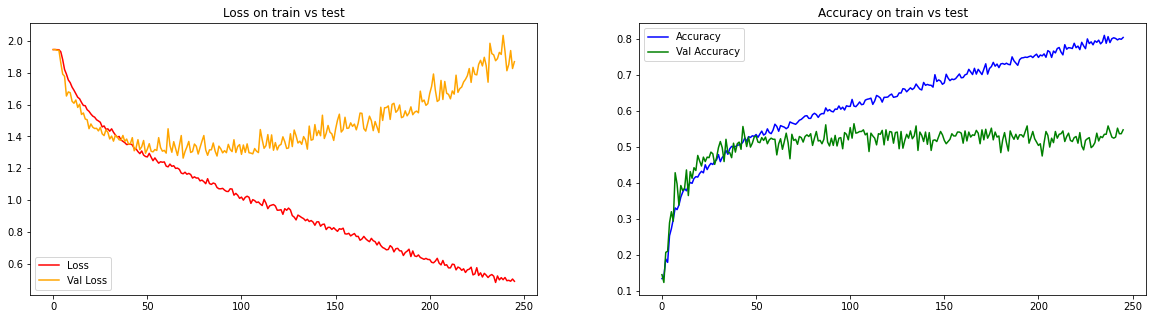

In [12]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')

plt.show()

## Confusion matrix on test data

In [13]:
y_test_hat = model.predict(X_test, batch_size=4)
y_test_hat = np.argmax(y_test_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

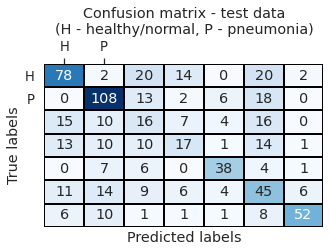

Classification report on test data
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       136
           1       0.67      0.73      0.70       147
           2       0.21      0.24      0.22        68
           3       0.36      0.26      0.30        66
           4       0.70      0.68      0.69        56
           5       0.36      0.47      0.41        95
           6       0.84      0.66      0.74        79

    accuracy                           0.55       647
   macro avg       0.54      0.52      0.52       647
weighted avg       0.56      0.55      0.55       647



In [14]:
# calculate confusion matrix & classification report
conf_m = confusion_matrix(y_test, y_test_hat)
clas_r = classification_report(y_test, y_test_hat)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix - test data\n(H - healthy/normal, P - pneumonia)')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

In [15]:
y_val_hat = model.predict(X_val, batch_size=4)
y_val_hat = np.argmax(y_val_hat, axis=1)
y_val = np.argmax(y_val, axis=1)